In [4]:
# Import Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output
from initial_brainstorm_test import *
%matplotlib inline

# Simple Harmonic Motion
Simple Harmonic Motion is one of the most common physical relations, appearing in every sub-field of physics: Mechanics, Electromagnetism, Quantum mechanics, etc. The goal of this exercise is to simulate physical systems that undergo simple harmonic motion, and give ourselves a clear visualization of how such systems behave over time. 

## Mass on a Spring
A mass-spring system is the first simple harmonic oscillator introduced in most introductory mechanics courses, where a spring attached to the wall is connected to a mass. 

(Insert a picture of a spring-mass system with free body diagram)

Such a simple harmonic oscillator has a closed-form solution, meaning we can write an equation of the position as a function of time. Complete the closed-form solution in the function below. 
\
\
*Hint: Feel free to look up the solution on the internet! In fact, it is a common practice, and encouraged, to look up functions and ideas when people write computer programs!*

In [5]:
def shm_position(t, A, k, m, phi):
    """
    Returns the position of a mass-spring simple harmonic oscillator at a given time. 
    
    Parameters:
    t: Time
    A: Amplitude
    k: Spring constant
    m: Mass
    phi: Initial phase shift
    
    Output: x
    x: Position of the oscillator
    """
    # Question 1
    w = np.sqrt(k / m)
    return A * np.sin(w * t + phi)

Run the next cell to test your code! 

In [6]:
# Test for Question 1
test1(shm_position)

Correct!
Well done!


With a function x(t) that describes the position of the harmonic oscillator over time, we can simulate the dynamics of a natural spring-mass system. Suppose the system has the following parameters: \
Spring Constant: 10 N/m \
Mass: 1.5 kg \
Amplitude: 1 m \
Initial Phase Shift: $\pi/2$ radians \
Time: 10000 entries equally spaced from 0 to 20 seconds

In [7]:
# Question 2
t1 = np.linspace(0, 20, 10000)
x1 = shm_position(t1, 1, 10, 1.5, np.pi/2)

In [8]:
# Test for Question 2
test2(t1, x1)

Correct!
Well done!


Now let's plot our data! \
Plot a position versus time graph in the next cell. 

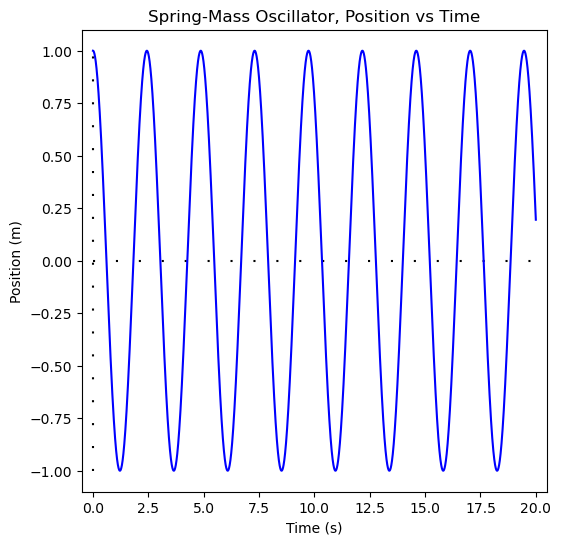

In [9]:
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

# Question 3
ax.plot(t1, x1, color="blue")

plt.show()

Thanks to the computational capabilities of Python, we can also generate a real-time version of the graph above. \
Run the following cell to view a real-time evolution of the spring-mass oscillator. 

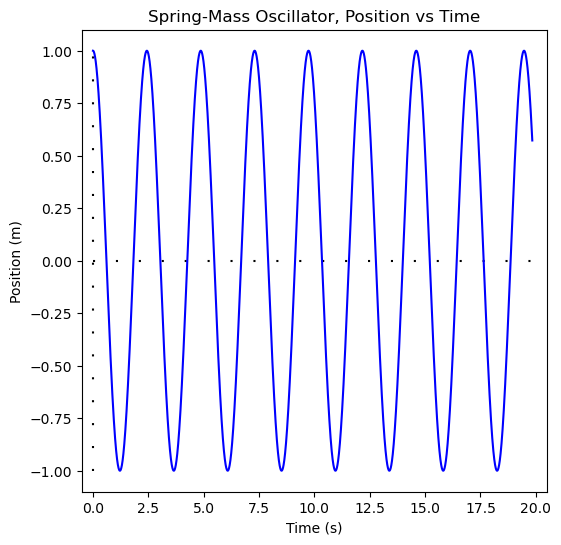

In [28]:
def live_plot(data):
    clear_output(wait=True)
    fig = plt.figure()
    fig.set_size_inches(6, 6)
    
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Spring-Mass Oscillator, Position vs Time")
    ax.set_xlim(-0.5, 20.5)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Position (m)")
    
    ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
    ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

    ax.plot(data[0], data[1], color="blue")
    plt.show()

data = [[], []]
for i in np.arange(len(t1) // 64):
    data[0].extend(t1[i * 64 - 64:i * 64])
    data[1].extend(x1[i * 64 - 64:i * 64])
    live_plot(data)

## Numerical Integration
(Insert this picture maybe http://spiff.rit.edu/classes/phys317/lectures/num_integ_c.gif) \
Almost all the equations in physics do not go beyond the second derivative ([Why?](https://physics.stackexchange.com/questions/685650/why-do-so-many-laws-in-physics-operate-on-the-second-derivative)). \
So if we have an equation describing a physical system, for example, $F = ma = m \frac{d^2x}{dt^2}$; \
And we are given an initial condition $x_o$, $v_o$; \
We can write a Python program that calculates the evolution of our system numerically, similar to the [Rectangular Integration](https://math.libretexts.org/Bookshelves/Calculus/Map%3A_Calculus__Early_Transcendentals_(Stewart)/05%3A_Integrals/5.01%3A_Areas_and_Distances#:~:text=We%20can%20use%20this%20regular%20partition%20as%20the%20basis%20of%20a%20method%20for%20estimating%20the%20area%20under%20the%20curve.%20We%20next%20examine%20two%20methods%3A%20the%20left%2Dendpoint%20approximation%20and%20the%20right%2Dendpoint%20approximation.) method you may have encountered in Calculus. That is: \
$$a_o = \frac{F_o}{m}$$
$$v_f = v_o + a_o \ dt$$
$$x_f = x_o + v_o \ dt$$
We shall model the same spring-mass system with the numerical integration method, and compare the results of the two different methods. \
In the next cell, write a function that takes in the initial position $x_o$ and velocity $v_o$, and an infinitesimal time $dt$, along with the other parameters of the spring, and return the final position and velocity after the time $dt$ has passed. 

In [11]:
def oscillator(k, m, x0, v0, dt):
    """
    Returns the position of a mass-spring simple harmonic oscillator at the next timestamp. 
    
    Parameters:
    k: Spring constant
    m: Mass
    x0: Initial position
    v0: Initial velocity
    dt: Infinitesimal time
    
    Output: (xf, vf)
    xf: Position of the oscillator after time dt
    vf: Velocity of the oscillator after time dt
    """
    # Question 4
    a0 = - k * x0 / m
    vf = v0 + a0 * dt
    xf = x0 + v0 * dt
    return xf, vf

In [12]:
# Test for Question 4
test4(oscillator)

Correct!
Well done!


In the previous section, we have modeled a spring-mass system initial placed at 1m and is at rest when $t$=0. Use $dt$ = 0.002s, model the same system with the numerical integration method for 10000 timestamps. \
The spring parameters from the previous section are: \
Spring Constant: 10 N/m \
Mass: 1.5 kg

In [23]:
# Question 5
x2 = np.array([1])
v2 = np.array([0])
t2 = np.array([0])

for i in np.arange(10000):
    x0 = x2[-1]
    v0 = v2[-1]
    t0 = t2[-1]
    dt = 0.002
    
    xf, vf = oscillator(10, 1.5, x0, v0, dt)
    tf = t0 + dt
    
    x2 = np.append(x2, xf)
    v2 = np.append(v2, vf)
    t2 = np.append(t2, tf)

In [24]:
# Test for Question 5
test5(x2, v2, t2)

Correct!
Well done!


Generate a plot the results of our numerical integration. 

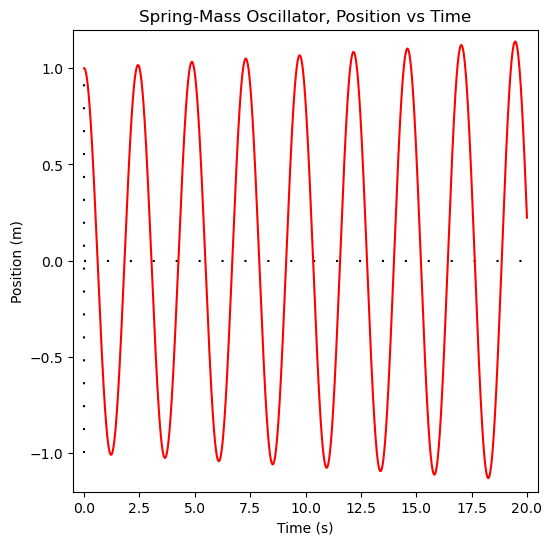

In [25]:
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

# Question 6
ax.plot(t2, x2, color="red")

plt.show()

If we graph the results of closed-form solution and the numerical integration on the same graph, we can indeed see some inconsistencies. Just like treating an integral as a finite sum, we will sacrafice some accuracy by modeling a physical system with numerical integration. We can limit these inconsistencies by using a smaller $dt$ value, though at the cost of computation speed. \
Still, the method of numerical integration is particularly useful, especially for some complicated relations that cannot be modeled with a closed-form solution. 

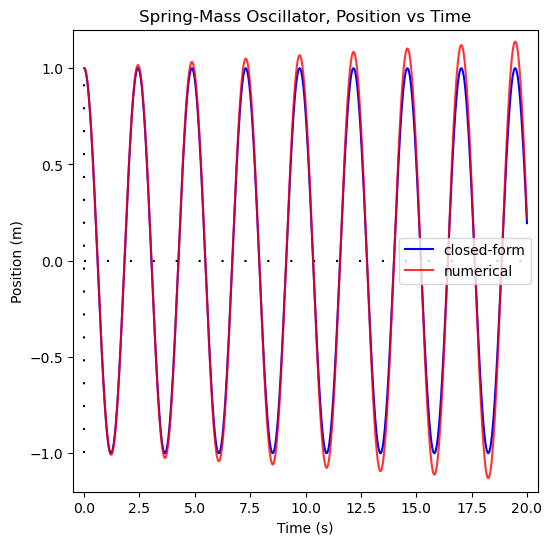

In [13]:
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

ax.plot(t1, x1, color="blue", label="closed-form")
ax.plot(t2, x2, color="red", label="numerical", alpha=0.8)

ax.legend()
plt.show()

# The Pendulum
Compare pendulum numerical integration and small-angle approximation

## Small-Angle Approximation
This is how we arrive at a closed-form solution. \
Percent error is small when... \
TBD

In [14]:
percent_error = lambda x: np.abs(np.sin(x) - x) / np.abs(np.sin(x))

## Numerical Integration
Normal pendulum has a sine term in it, so we can't achieve a closed-form solution for pendulums in general. 